In [34]:
#reading the telecom dataset
library(stats)
library(caTools)
library(Amelia)
library(dplyr)

In [35]:
setwd("D:/Dropbox/Data Science and Analytics/R/R-codes")
telecomDataframe =read.csv(file="WA_Fn-UseC_-Telco-Customer-Churn.csv")
#print structure of telecom dataframe
print(str(telecomDataframe))

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

In [36]:
#check for NA value
any(is.na(telecomDataframe))

[1] TRUE

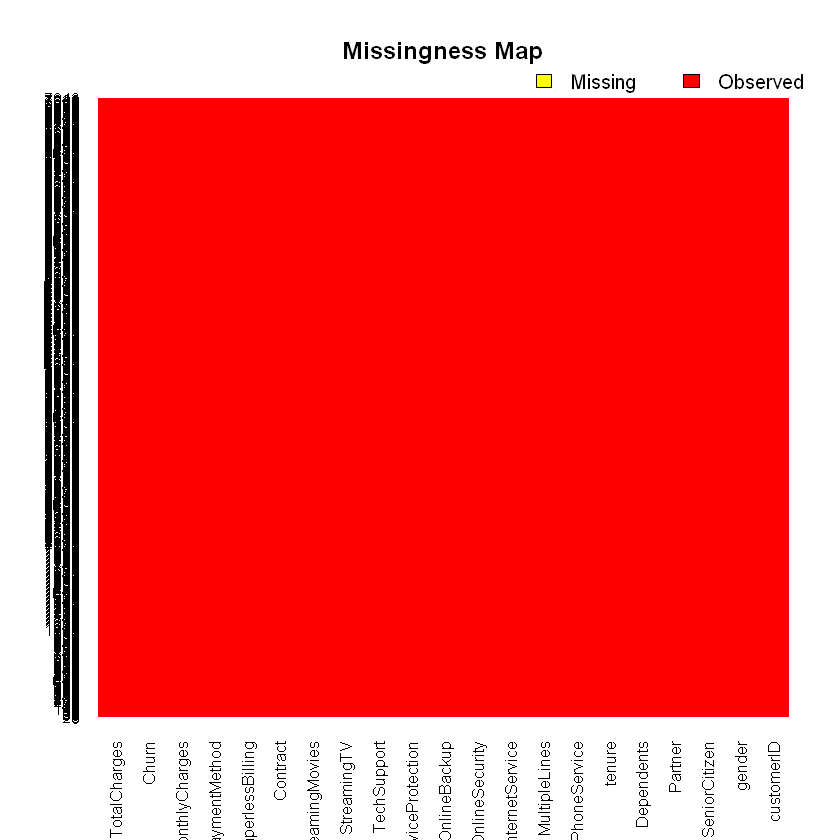

In [37]:
#visualize the missing value using the missing map from the Amelia package
missmap(telecomDataframe,col=c("yellow","red"))

In [38]:
#creating tenure interval
group_tenure <- function(tenure){
    if (tenure >= 0 && tenure <= 6){
        return('0-6 Month')
    }else if(tenure > 6 && tenure <= 12){
        return('6-12 Month')
    }else if (tenure > 12 && tenure <= 24){
        return('12-24 Month')
    }else if (tenure > 24 && tenure <=36){
        return('24-36 Month')
    }else if (tenure > 36 && tenure <=48){
        return('36-48 Month')
    }else if (tenure > 48 && tenure <= 62){
        return('48-62 Month')
    }else if (tenure > 62){
        return('> 62 Month')
    }
}

In [39]:
#apply tenure interval function to create a new tebure interval variable
telecomDataframe$tenure_interval=sapply(tenure,group_tenure)
telecomDataframe$tenure_interval=as.factor(tenure_interval)

In [40]:
#removing Columns "customerID" and "tenure" having more levels
telecomDataframe=select(telecomDataframe,-customerID,-tenure)

In [41]:
print(str(telecomDataframe))

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No internet service",..: 1 1 1 3 1 1 1 1 3 1 ...
 $ StreamingTV     : Factor w/ 3 levels

In [42]:
# modifying the levels for given variables
telecomDataframe$MultipleLines    <-as.character(telecomDataframe$MultipleLines   )
telecomDataframe$OnlineSecurity <-as.character(telecomDataframe$OnlineSecurity)
telecomDataframe$OnlineBackup  <-as.character(telecomDataframe$OnlineBackup) 
telecomDataframe$DeviceProtection<-as.character(telecomDataframe$DeviceProtection)
telecomDataframe$TechSupport<-as.character(telecomDataframe$TechSupport)
telecomDataframe$StreamingTV<-as.character(telecomDataframe$StreamingTV)
telecomDataframe$StreamingMovies <- as.character(telecomDataframe$StreamingMovies)
telecomDataframe$Contract  <- as.character(telecomDataframe$Contract)

In [45]:
telecomDataframe$MultipleLines[telecomDataframe$MultipleLines=='No phone service']   ='No'
telecomDataframe$OnlineSecurity[telecomDataframe$OnlineSecurity=='No internet service'] ='No'
telecomDataframe$OnlineBackup[telecomDataframe$OnlineBackup=='No internet service'] ='No'
telecomDataframe$DeviceProtection[telecomDataframe$DeviceProtection=='No internet service'] ='No'
telecomDataframe$TechSupport[telecomDataframe$TechSupport=='No internet service'] ='No'
telecomDataframe$StreamingTV[telecomDataframe$StreamingTV=='No internet service'] ='No'
telecomDataframe$StreamingMovies[telecomDataframe$StreamingMovies =='No internet service'] ='No'
telecomDataframe$Contract[telecomDataframe$StreamingMovies =='No internet service'] ='No'

In [46]:
print(str(telecomDataframe))

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : chr  "No" "No" "No" "No" ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 1

In [47]:
# converting character variables into factor variables
telecomDataframe$MultipleLines <- as.factor(telecomDataframe$MultipleLines)
telecomDataframe$OnlineSecurity <- as.factor(telecomDataframe$OnlineSecurity)
telecomDataframe$OnlineBackup <- as.factor(telecomDataframe$OnlineBackup)
telecomDataframe$DeviceProtection <- as.factor(telecomDataframe$DeviceProtection)
telecomDataframe$TechSupport <- as.factor(telecomDataframe$TechSupport)
telecomDataframe$StreamingTV <- as.factor(telecomDataframe$StreamingTV)
telecomDataframe$StreamingMovies <- as.factor(telecomDataframe$StreamingMovies)

In [48]:
# check the number of NA rows if it is relatively small in number then ignore those rows from the analysis
telecomDataframe <- na.omit(telecomDataframe)

In [49]:
# set the seed it will output same output when ever the model is executed
set.seed(123)

In [50]:
# sample the input data with 70% for training and 30% for testing
sample=sample.split(telecomDataframe$Churn,SplitRatio=0.7)

In [51]:
#train and test data
traindata=subset(telecomDataframe,sample=TRUE)
testdata=subset(telecomDataframe,sample=FALSE)

In [52]:
#creating logistic model
telecomModel <- glm(Churn ~ .,family=binomial(link="logit"),data=traindata)
print(summary(telecomModel))


Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1815  -0.6711  -0.2927   0.6144   3.1083  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -9.456e-01  8.608e-01  -1.099  0.27196    
genderMale                           -1.653e-02  6.542e-02  -0.253  0.80053    
SeniorCitizen                         2.271e-01  8.493e-02   2.674  0.00749 ** 
PartnerYes                            4.909e-03  7.835e-02   0.063  0.95004    
DependentsYes                        -1.276e-01  9.017e-02  -1.415  0.15699    
PhoneServiceYes                       1.590e-01  6.537e-01   0.243  0.80777    
MultipleLinesYes                      5.013e-01  1.789e-01   2.802  0.00508 ** 
InternetServiceFiber optic            1.746e+00  8.041e-01   2.172  0.02986 *  
InternetServiceNo                    -1.614e+00  8.134e-01  -1.984

In [53]:
#test the model
test.pred=predict(telecomModel,newdata=testdata,type="response")

In [55]:
fitted.result=ifelse(test.pred>0.5,1,0)
testdata$Churn=as.character(testdata$Churn)
testdata$Churn[testdata$Churn=='Yes']=1
testdata$Churn[testdata$Churn=='No']=0


In [58]:
#misclassified rate
misclassified=mean(fitted.result!=testdata$Churn)
misclassified

[1] 0.1925484

In [60]:
# calculating the accuracy rate
accuracyRate <- 1-misclassified
print(accuracyRate)

[1] 0.8074516


In [64]:

# confusion matrix
table(testdata$Churn,fitted.result)

# cbinding actual results with the predicted results
results <- cbind(fitted.result,testdata$Churn)
colnames(results) <- c("predicted","actual")
results <- as.data.frame(results)
print(results)

   fitted.result
       0    1
  0 4701  462
  1  892  977

     predicted actual
1            1      0
2            0      0
3            0      1
4            0      0
5            1      1
6            1      1
7            0      0
8            0      0
9            1      1
10           0      0
11           0      0
12           0      0
13           0      0
14           0      1
15           0      0
16           0      0
17           0      0
18           0      0
19           0      1
20           0      0
21           1      1
22           0      0
23           0      1
24           0      0
25           0      0
26           0      0
27           1      1
28           0      1
29           0      0
30           0      1
31           0      0
32           1      0
33           0      0
34           0      0
35           0      0
36           0      0
37           1      1
38           0      0
39           1      1
40           1      1
41           0      0
42           0      0
43           0      0
44           0      0
45        